<img src="TechLabs.png">

<h2>Please enter your full name here:</h2> Jakob Merz


<p> This exam will test your knowledge in Artificial Intelligence. </p>
<p> We will test the following: </p>

- Logistic Regressions
- Neural Networks
- Monte Carlo Simulation

# Question 1:
Below is the code to import a standard dataset with breast cancer.
When you run the cell, you will have it stored as the object "data",
and the description of the dataset is printed out for you.

### Your task is to create two models for classifying the diagnosis, and compare the accuracy metrics for the two:
### 1. a) Logistic Regression: 
"sklearn.linear_model" offers good logit classifiers. Because the dataset is fairly small (~500 rows), we suggest that you use the "liblinear" solver for fitting the logit classifier.

Split the dataset into a test and training (30% test / 70% training) dataset and train the model on the training dataset. Then, classify the test dataset, and compute the accuracy, which you can print as an output.

P.S.: We do not expect you to regularize for type 1 or type 2 errors. Your goal is to build models that classify well the diagnosis. Also, we do not expect you to spend hours on feature engineering and/or other things that may or may not improve testing accuracy. A good answer shall just contain a sensible model and the testing accuracy.

In [15]:
import numpy as np
import pandas as pd

from sklearn import datasets
data = datasets.load_breast_cancer()
print(np.shape(data.data))

(569, 30)


In [16]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [33]:
#import modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# seperate X and y
X = data.data
y = data.target

# split into training and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=7)

#instantiate model
model = LogisticRegression(solver='liblinear')
model.fit(X_train,y_train)

#find accuracy
result = model.score(X_test, y_test)
print(f'Test: 70% Train: 30%')
print(f'Accuracy {result*100:5.3f}%')
print('-------------')
print()

logitacc = result



Test: 70% Train: 30%
Accuracy 94.737%
-------------



# Print the logit accuracy below:

In [32]:
#logitacc = "[ENTER YOUR SCORE HERE]"
print(f"\ntesting set accuracy with logit is: {logitacc*100:5.3f}%")


testing set accuracy with logit is: 94.737%


### 1. b) Feedforward Neural Network:
So far, so good. Let's see how a feedforward neural network does for the same task.

Take the same train/test split as in a), and construct the following neural network, which you fit to the data:

In [34]:
import pickle
pickle.loads(b'\x80\x03]q\x00(X\x15\x00\x00\x00Model: "sequential_2"q\x01XA\x00\x00\x00_________________________________________________________________q\x02XA\x00\x00\x00Layer (type)                 Output Shape              Param #   q\x03XA\x00\x00\x00=================================================================q\x04XA\x00\x00\x00dense_5 (Dense)              (None, 30)                930       q\x05XA\x00\x00\x00_________________________________________________________________q\x06XA\x00\x00\x00dense_6 (Dense)              (None, 50)                1550      q\x07XA\x00\x00\x00_________________________________________________________________q\x08XA\x00\x00\x00dense_7 (Dense)              (None, 30)                1530      q\tXA\x00\x00\x00_________________________________________________________________q\nXA\x00\x00\x00dense_8 (Dense)              (None, 1)                 31        q\x0bXA\x00\x00\x00=================================================================q\x0cX\x13\x00\x00\x00Total params: 4,041q\rX\x17\x00\x00\x00Trainable params: 4,041q\x0eX\x17\x00\x00\x00Non-trainable params: 0q\x0fXA\x00\x00\x00_________________________________________________________________q\x10e.')

['Model: "sequential_2"',
 '_________________________________________________________________',
 'Layer (type)                 Output Shape              Param #   ',
 '=================================================================',
 'dense_5 (Dense)              (None, 30)                930       ',
 '_________________________________________________________________',
 'dense_6 (Dense)              (None, 50)                1550      ',
 '_________________________________________________________________',
 'dense_7 (Dense)              (None, 30)                1530      ',
 '_________________________________________________________________',
 'dense_8 (Dense)              (None, 1)                 31        ',
 '=================================================================',
 'Total params: 4,041',
 'Trainable params: 4,041',
 'Non-trainable params: 0',
 '_________________________________________________________________']

### You can use the library keras to contruct the ANN. Since we are dealing with a classification problem, we recommend binary_crossentropy as a loss function.
Choose a reasonable batch size and epoch count and train the model.
### Here again, print the testing dataset accuracy:

In [69]:
#importing packages
from keras import layers,models

net = models.Sequential()
#adding first  layer
net.add(layers.Dense(30, activation='relu', input_shape=(len(X[0]),)))
#adding second with 50
net.add(layers.Dense(50, activation='relu')) 
#adding third layer with 30
net.add(layers.Dense(30, activation='relu')) 
#add activation layer
net.add(layers.Dense(1, activation='sigmoid'))

net.compile(optimizer='nadam',loss='binary_crossentropy',metrics=['accuracy'])


net.fit(X_train, y_train, epochs=50, batch_size=32,verbose=False)
test_loss , ANNacc= net.evaluate(X_test, y_test)
print('NeuralNet Accuracy:')
print(ANNacc)
print('Logit Accuracy:')
print(logitacc)


171/171 [==============================] - 0s 256us/step
NeuralNet Accuracy:
0.9239766001701355
Logit Accuracy:
0.9473684210526315


In [42]:
#ANNacc = "[ENTER YOUR SCORE HERE]"
print(f"\ntesting set accuracy with logit is: {ANNacc}")


testing set accuracy with logit is: 0.9298245906829834


### 1. c) Compare the performance of the neural net with the logit. Which one seems better at the job and why might that be?
Please also comment on which model you would choose to implement in a case like this and why.


The logistic regression seems to be better at predicting breast cancer.
There can be several reasons for this:
1. Limited amount of data available: Neural Networks generally need more data than LR to yield meaningful outcomes

2. Linearlity of classes: If the two classes are seperable by a line (linearly) logistic regression is a good choice (except for datasets with lot of noise and outliers).  

3. Additional Thoughts: We should try to further reduce the features to include only the most meaningful in signalling breast cancer e.g. through recursive feature elimination or principal component analysis(although harder to interpret pca component due to higher dimensionality).



# Question 2:
### Your coding skills have gained you a job as an options trader at a successful hedge fund! Congratulations!!

At the first day, your boss comes to you and asks you, whether he should buy a _call option_* with a certain set of characteristics for 1€.

    *A call option gives you the right (but not obligation) to buy a share for a certain strike price. In other words, if the stock price is higher than the strike price, you get the difference, otherwise, you get 0: 
    
    callpayoff = max(stockprice - strikeprice, 0) 

To price the option, you shall build a monte-carlo simulator which generatates _1 000 000_ random walks, each representing the stock price in one year, which is when the option can be expired. By taking the average of these payouts, you will get the expected payout at expiry!

Luckily, your boss has also given you the characteristics and hints for how the stock price moves: 

The stock price follows a student T distribution with 3 degrees of freedom (the rvs function within the t class from scipy.stats package is a great tool for creating random walks with this distribution: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html  ctrl+f "rvs") 

- The stock price today: 69
- Stock returns follow student T distribution with 3 degrees of freedom
- drift of 10% per year 
- volatility of 20%
- strike price of the option is 96

### Build a function that returns the price of the call option, and shows your boss what payout he can expect from the option in order to explain him, whether he should buy it or not.

    P.S.: If you run into trouble on your way, you can always ask for tips from your boss and since he is a nice guy, he will also give a good grade for all attempts!

visualization of walks


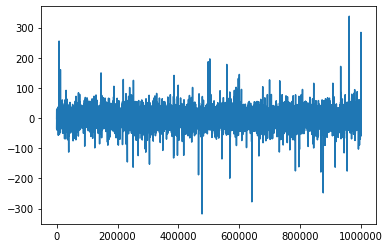

visualization of net value of option


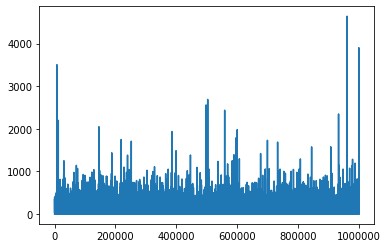

The option is worth buying
Net Value of option is: 13.514978591898645


In [68]:
import matplotlib.pyplot as pp

# variables
strike_price = 96
stock_price = 69
drift = 0.1
volatility = 0.2
deg_of_free = 3
iterations = 1000000
option_price = 1


# random walks
walks = list(t.rvs(3, loc=0, scale=3, size=1000000, random_state=None))

print('visualization of walks')
pp.plot(walks)
pp.show()

#payout function
def call_payoff(S_T, strike_price):
    return max(S_T-strike_price,0)

#asset price function
def asset_price(stock_price,volatility,drift,walk):
    stock_price += drift*stock_price + walk*volatility*stock_price
    return stock_price

#instantiate array for results
results = []

#build monte carlo simulator with 1m random walks
for walk in walks:
    #determine asset price
    p = asset_price(stock_price,volatility,drift,walk)
    #determine net value of option by substracting price of option
    value = call_payoff(p,strike_price) - option_price
    #append payoff to results
    results.append(value)

    #visualize results
print('visualization of net value of option')
pp.plot(results)
pp.show()

#determine average value of option
value = (sum(results)/len(results))

# if avg payoff above 0 buy option else dont buy
if ( value <= 0):
    print('We should not buy')
else:
    print('The option is worth buying')
         
print(f'Net Value of option is: {value}')



In [53]:
from scipy.stats import t
result = 
result

# Good luck!

Don't forget: google, github and stack overflow are your best friends!
